In [1]:
import numpy as np
import pandas as pd 
import scipy.linalg as la
import sympy as sy
from matplotlib import pyplot as plt
from datetime import datetime
from scipy import sparse

In [2]:
def Prob1(A, b, tol, maxiters):
    x = np.zeros_like(b)
    xnew = np.zeros_like(b)
    ## Series of steps to create a diag inverse without doing the 
    ## expensive computation
    I = np.eye(A.shape[0])
    tmp = np.ones_like(A) - I
    tmp = tmp + np.diag(np.diag(A)) 
    invD = np.diag(np.diag((I / tmp)))
    errs = np.zeros(maxiters)
    for i in range(maxiters):
        xnew = x + np.matmul(invD, b - np.matmul(A, x))
        if (la.norm(xnew - x) < tol) and np.allclose(np.matmul(A,x), b, tol, tol):
            print("Converged at Iteration {}".format(i+1))
            print("Stable Vector: ", x)
            break
        else: 
            errs[i] = la.norm(xnew - x)
        if errs[i] > 100000000: break
        x = xnew
    return x, errs

A = np.array([[2, 0, -1], [-1, 3, 2], [0, 1, 3]])
b = np.array([3, 3, -1])
tol = 1.E-8
rv = Prob1(A, b, tol, 500)

Converged at Iteration 31
Stable Vector:  [ 1.  2. -1.]


In [3]:
def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

for i in range(2, 20):
    A = diag_dom(i)
    b = np.random.random(i)
    rv = Prob1(A, b, tol, 500)

Converged at Iteration 2
Stable Vector:  [0.96638399 0.20358345]
Converged at Iteration 3
Stable Vector:  [0.02957491 0.05138123 0.29775343]
Converged at Iteration 3
Stable Vector:  [0.37428825 0.28482431 0.72508742 0.04111042]
Converged at Iteration 39
Stable Vector:  [0.14129944 0.07886256 0.09561192 0.01073045 0.0638684 ]
Converged at Iteration 5
Stable Vector:  [0.12908464 0.72416786 0.07368196 0.88360324 0.14311687 0.27071484]
Converged at Iteration 18
Stable Vector:  [0.2573407  0.00524413 0.09043999 0.06030231 0.14923588 0.04462041
 0.04941057]
Converged at Iteration 52
Stable Vector:  [ 0.16233765  0.03226587 -0.02164728  0.03740312  0.12148408 -0.03468549
  0.14368439 -0.02677824]
Converged at Iteration 34
Stable Vector:  [-0.22162824 -0.01285334  0.04322374  0.42149276  0.45885653 -0.07918205
  0.39039225  0.93337291  0.21774671]
Converged at Iteration 31
Stable Vector:  [ 0.32839565 -0.03479778  0.64578388  0.39680004 -0.02405218  0.32683353
 -0.04349927 -0.45301973 -0.27941

Converged at Iteration 31
Stable Vector:  [ 1.  2. -1.]


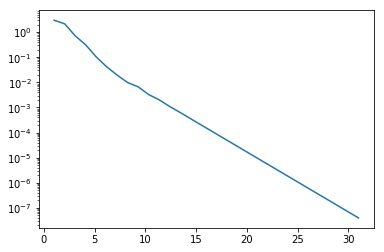

In [4]:
def Prob2(A, b, tol, maxiters, plot = False):
    x = np.zeros_like(b)
    xnew = np.zeros_like(b)
    ## Series of steps to create a diag inverse without doing the 
    ## expensive computation
    I = np.eye(A.shape[0])
    tmp = np.ones_like(A) - I
    tmp = tmp + np.diag(np.diag(A)) 
    invD = np.diag(np.diag((I / tmp)))
    errs = np.zeros(maxiters)
    for i in range(maxiters):
        xnew = x + np.matmul(invD, b - np.matmul(A, x))
        if (la.norm(xnew - x) < tol) and np.allclose(np.matmul(A,x), b, tol, tol):
            print("Converged at Iteration {}".format(i+1))
            print("Stable Vector: ", x)
            break
        else: 
            errs[i] = la.norm(np.matmul(A,x) - b, ord=np.inf)
        if errs[i] > 100000000: break
        x = xnew
        
    if (plot == True):
        plt.semilogy(np.linspace(1, i+1, i), errs[:i])
    return x, errs

A = np.array([[2, 0, -1], [-1, 3, 2], [0, 1, 3]])
b = np.array([3, 3, -1])
tol = 1.E-8
rv = Prob2(A, b, tol, 500, True)

Converged at Iteration 15
Stable Vector:  [ 1.  2. -1.]
[2.16666667e+00 1.11111111e+00 1.85185185e-01 3.08641975e-02
 5.14403292e-03 8.57338820e-04 1.42889803e-04 2.38149672e-05
 3.96916121e-06 6.61526868e-07 1.10254478e-07 1.83757471e-08]


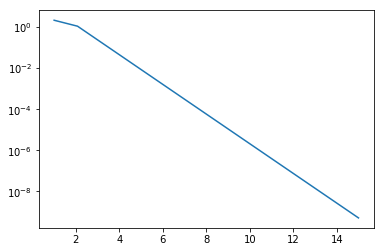

In [5]:
def Prob3(A, b, tol, maxiters, plot = False):
    x = np.zeros_like(b, dtype=float)
    xnew = np.zeros_like(x, dtype=float)
    ## Series of steps to create a diag inverse without doing the 
    ## expensive computation
    D = np.diag(A)
    invD = 1/D.astype(float)
    errs = np.zeros(maxiters)
    for k in range(maxiters):
        for i in range(len(x)):
            xnew[i] = x[i] + ((invD[i]) * (b[i] - np.matmul(A[i,:].transpose(), x)))
        if (la.norm(xnew - x) < tol) and np.allclose(np.matmul(A,x), b, tol, tol):
            print("Converged at Iteration {}".format(k+1))
            print("Stable Vector: ", x)
            break
        else: 
            errs[k] = np.linalg.norm(np.matmul(A, xnew) - b, ord=np.inf)
        if errs[k] > 100000000:
            print("function machine broke")
            break
        x = xnew
        
    if (plot == True):
        plt.semilogy(np.linspace(1, k+1, k), errs[:k])
    return x, errs


A = np.array([[2, 0, -1], [-1, 3, 2], [0, 1, 3]])
b = np.array([3, 3, -1])
tol = 1.E-10
rv = Prob3(A, b, tol, 500, True)
print(rv[1][:12])

Converged at Iteration 2
Stable Vector:  [0.94718806 0.69207308]
Converged at Iteration 2
Stable Vector:  [0.54259947 0.29933008 0.24437501]
Converged at Iteration 2
Stable Vector:  [0.12888801 0.54619447 0.3586271  0.2583772 ]
Converged at Iteration 3
Stable Vector:  [0.17842879 0.03349705 0.09893851 0.22370103 0.1253302 ]
Converged at Iteration 23
Stable Vector:  [ 0.60186549  0.23059061 -0.20019923  0.26453024  0.78622978  0.15516533]
Converged at Iteration 4
Stable Vector:  [ 0.13446401  0.31193283 -0.17315562  0.68120177  0.14292171  0.38155962
  0.40563844]
Converged at Iteration 15
Stable Vector:  [ 0.03098324  0.08163636  0.15638077  0.24321065  0.1559722   0.92792965
 -0.01055268  0.0296976 ]
Converged at Iteration 31
Stable Vector:  [ 0.26852302  0.08369251 -0.02784222  0.09241067  0.10128804  0.24408757
 -0.03045491  0.01520985  0.17294916]
Converged at Iteration 17
Stable Vector:  [ 0.24972253  0.10154167  0.0692886   0.0911387  -0.10276965  0.13920623
  0.17229289  0.24584

/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


Converged at Iteration 25
Stable Vector:  [ 0.83766253 -0.02984431  0.17708826  0.34505757  0.07735672  0.15620466
  0.0740497   0.21693618  0.09886879  0.12130595 -0.00980454  0.02633563
 -0.36946009 -0.07700351  0.94719949  0.08925196  0.11808323]
Converged at Iteration 23
Stable Vector:  [ 0.3131093   0.3181926  -0.0557476   0.03008093  0.18368679  0.15597691
  0.07902947  0.12280175 -0.00295378  0.07002786  0.10625898  0.11173657
  0.05639547 -0.03213379  0.22446916  0.28556305  0.04095746  0.11959101]
Converged at Iteration 19
Stable Vector:  [ 0.06817491  0.01167651  0.06503044  0.0958531   0.05190297  0.17199611
  0.1749058   0.23388449  0.13522481  0.03065667  0.00720824  0.160567
  0.22908834  0.0647741   0.13774672  0.11455843 -0.01519596  0.06555309
  0.03884349]


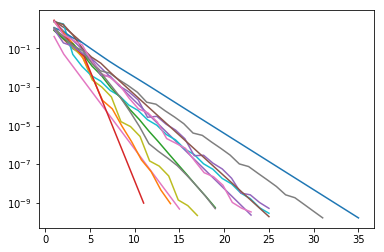

In [6]:
for i in range(2, 20):
    A = diag_dom(i)
    b = np.random.random(i)
    rv = Prob3(A, b, tol, 500, True)

In [21]:
def Prob4(A, b, tol, maxiters):
    x = np.zeros_like(b, dtype=float)
    xnew = np.zeros_like(x, dtype=float)
    errs = np.zeros(maxiters)
    A = A.tocsr()
    for k in range(maxiters):
        xnew = np.copy(x)
        for i in range(len(x)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            xnew[i] = x[i] + ((1 / A[i,i]) * (b[i] - Aix)) 
        if (la.norm(xnew - x, np.inf) < tol):
            print("Converged at Iteration {}".format(k+1))
            print("Stable Vector: ", x)
            break
        else:       
            errs[k] =  la.norm(A @ xnew - b, ord=np.inf)
        if errs[k] > 100000000:
            print("function machine broke")
            break
        x = xnew
    return x, errs
        
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
tol = 1.E-10
rv = Prob4(A, b, tol, 500)

Converged at Iteration 15
Stable Vector:  [0.00772531 0.00508759 0.00491328 ... 0.00754473 0.00269238 0.00711273]


In [27]:
def Prob5(A, b, w, tol = 1.E-8, maxiters = 100):
    x = np.zeros_like(b, dtype=float)
    xnew = np.zeros_like(x, dtype=float)
    errs = np.zeros(maxiters)
    A = A.tocsr()
    for k in range(maxiters):
        if (k%10 == 9): print("Iteration: {}".format(k+1))
        xnew = np.copy(x)
        for i in range(len(x)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x[A.indices[rowstart:rowend]]
            xnew[i] = x[i] + ((w / A[i,i]) * (b[i] - Aix)) 
        if (la.norm(xnew - x, np.inf) < tol):
            print("Converged at Iteration {}".format(k+1))
            print("Stable Vector: ", x)
            break
        else:       
            errs[k] =  la.norm(A @ xnew - b, ord=np.inf)
        if errs[k] > 100000000:
            print("function machine broke")
            break
        x = xnew
    return x, k
        
        
A = sparse.csr_matrix(diag_dom(5000))
b = np.random.random(5000)
tol = 1.E-8
weights = np.linspace(.1, 1, 10)
iterations = np.zeros(len(weights))
for i, w in enumerate(weights):
    print("Weight:", w)
    vec, k = Prob5(A, b, w)
    iterations[i] = k

Weight: 0.1
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Weight: 0.2
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Converged at Iteration 77
Stable Vector:  [0.00807844 0.00370649 0.00183738 ... 0.00346009 0.00511132 0.00465062]
Weight: 0.30000000000000004
Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Converged at Iteration 51
Stable Vector:  [0.00807844 0.0037065  0.00183739 ... 0.00346009 0.00511131 0.00465063]
Weight: 0.4
Iteration: 10
Iteration: 20
Iteration: 30
Converged at Iteration 38
Stable Vector:  [0.00807845 0.0037065  0.00183739 ... 0.00346009 0.00511131 0.00465064]
Weight: 0.5
Iteration: 10
Iteration: 20
Converged at Iteration 29
Stable Vector:  [0.00807845 0.0037065  0.00183739 ... 0.00346009 0.00511131 0.00465064]
Weight: 0.6
Iteration: 10
Iteration: 20
Converged at Iteration 24
Stable Vector:  [0.0080